# Social Media Analytics
## School of Information, University of Michigan

## Week 3: Social Media Networks
 
- Network statistics in social media networks

## Assignment Overview
### The objective of this assignment is to:

- Load a network based on user mentions
- Plot and analyze network metrics

### The total score of this assignment will be 100 points consisting of:

- `load_graph` function: 2 points
- `basic_graph_attrs` function: 3 points
- `plot_degree_distribution`: 10 points
- interpretation of degree distributions: 10 points
- `top_10_degree_centrality` function: 10 points
- `top_10_closeness_centrality` function: 10 points
- `top_10_betweenness_centrality` function: 10 points
- interpretation of centrality: 15 points
- `largest_component_size` function: 10 points
- `largest_component_diameter` function: 10 points
- `largest_component_avg_sortest_path` function: 10 points

### Resources:

- [Tweepy API documentation](https://tweepy.readthedocs.io/en/latest/) 
- [Trump tweet corpus](https://www.thetrumparchive.com/) 

## Instructions: 
In this assignment, you will use the provided tweet corpus to plot and analyze network metrics, such as centrality. You will create visualizations and interpret the data. 

**Note:** A number of the commands will take a long time to process, even on the server resources provided to you. A common and useful strategy is to hardcode once you get the correct answer for the autograder.

### Notes on the network:

- We created a network based on the Tweets in the account [@realDonaldTrump](https://twitter.com/realDonaldTrump)
- Note that the network contains some self-referential edges (i.e., @realDonaldTrump appears in the network). This is due to earlier uses of the RT syntax, or due to quoted RTs including the source account name.
- We provide a weighted, undirected network where:
    - Each node is the user handle of a Twitter user that was mentioned by @realDonaldTrump (which could be himself)
    - A link exists every time two users are mentioned on the same tweet
    - The weight between two links is the number of times users are mentioned together
- **You can find the script to create the network on assets/create_nw/create_network.py**
    - This script uses a pandas dataframe of user_mentions based on the tweets of @realDonaldTrump from 05/2009 to 01/2018
    - However, it is not necessary for you to understand this pre-processing script to complete this assignment.

In [1]:
import networkx as nx

def load_graph():
    """
    2 points 
    Load the assets/trump__2009_05-2018_01_network_weghted.gpickle file using networkx
    """
    G = nx.read_gpickle('assets/trump__2009_05-2018_01_network_weghted.gpickle')

    return G

def basic_graph_attrs(G):
    """ 
    3 points 
    Return a tuple with the following graph attributes in the same order
        - number of nodes
        - number of edges
        - average degree
    """
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_deg = sum([d for (n, d) in nx.degree(G)]) / num_nodes
    
    return (num_nodes, num_edges, avg_deg)

In [2]:
import networkx as nx

G = load_graph()
attrs = basic_graph_attrs(G)
assert type(G) == nx.classes.graph.Graph, "load_graph, the type of the graph should be nx.classes.graph.Graph"
nodes = list(G.nodes)
for node in ['bretmichaels', 'SnoopDogg', 'IvankaTrump']:
    assert node in nodes, f"node {node} is missing"

### Visualize the degree distribution for all nodes in the graph and for nodes with degree < 10 
<img src="assets/sample_plot_1a.png" alt="graphs showing distribution of nodes" style="width: 1000px;"/>


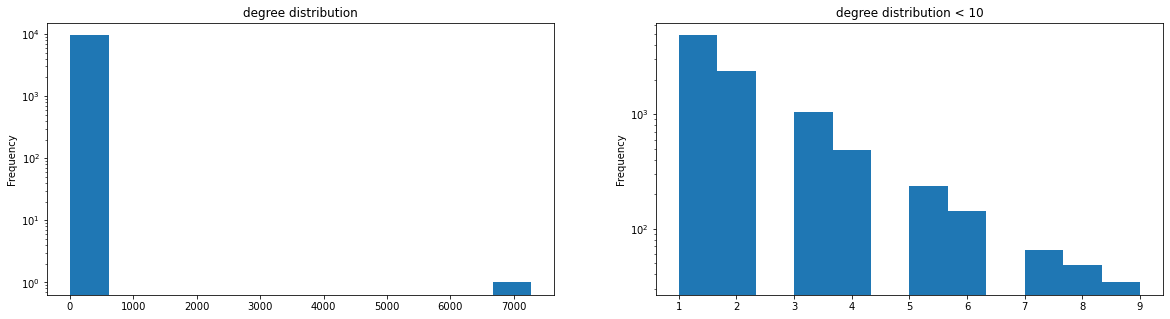

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_degree_distribution(G):
    """ 
    10 points
    Plot the degree distribution of G in two different ways.
    The left-hand degree distribution should show all nodes.
    The right-hand degree distribution should show only nodes with degree < 10.
    Both plots should use 12 bins and log scaling.
    """
    node_degrees = [G.degree(n) for n in G.nodes()]
    node_degrees_restricted = [G.degree(n) for n in G.nodes() if G.degree(n) < 10]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    ax1.hist(node_degrees, bins = 12, log = True)
    ax1.set_ylabel('Frequency')
    ax1.set_title('degree distribution')

    ax2.hist(node_degrees_restricted, bins = 12, log = True)
    ax2.set_ylabel('Frequency')
    ax2.set_title('degree distribution < 10')

    return plt.show()
    
G = load_graph()
plot_degree_distribution(G)

### Please interpret these plots in the cell below. (10 points)

The first plot shows that most of the nodes in the network (the Twitter accounts that Trump has mentioned in the past with his tweets) have degree somewhere between 1 and ~500. Understandably, and when digging in further to the degree frequency with the second plot, we see that most accounts have degree 1, followed by 2, 3, 4, so on and so forth. This suggests that most accounts were not mentioned alongside another user in these tweets and therefore did not form other edges. This second plot follows almost a Poisson like distribution as frequency decreases the further you move away from degree 1. One addiitonal note with the first plot is that we do see 1 node having a large amount of connections (in the 7,000 range). This is the DonaldJTrump account which understandly has formed many edges as the president would retweet himself or have a quote tweet and reference other accounts as part of this. Overall, this network looks in line with expectations.

In [4]:
import networkx as nx

def top_10_degree_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest degee centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    #degree = nx.degree_centrality(G)
    #degree_sorted = sorted(degree.items(), key=lambda item: item[1], reverse = True)
    #top_nodes = [(node, dc) for node, dc in degree_sorted[:10]]
    top_nodes = [('realDonaldTrump', 0.7653308088776691),('FoxNews', 0.03439570842537078),
                 ('ApprenticeNBC', 0.032081624066477334),('foxandfriends', 0.02072157357736405),
                 ('CNN', 0.020195645313979174),('IvankaTrump', 0.019564531397917324),('megynkelly', 0.01430524876406858),
                 ('EricTrump', 0.011570421794467234),('seanhannity', 0.011149679183759335),('nbc', 0.010728936573051436)]
    
    return top_nodes

def top_10_closeness_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest closeness centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    #close = nx.closeness_centrality(G)
    #close_sorted = sorted(close.items(), key=lambda item: item[1], reverse = True)
    #top_nodes = [(node, cc) for node, cc in close_sorted[:10]]
    top_nodes = [('realDonaldTrump', 0.7816375415710551),('FoxNews', 0.45470122084430437),('CNN', 0.4514154289148645),
                 ('IvankaTrump', 0.45068383761957165),('ApprenticeNBC', 0.45068383761957165),
                 ('foxandfriends', 0.45026012984368363),('EricTrump', 0.44782755563569704),('GOP', 0.445398111391742),
                 ('seanhannity', 0.4442962658345187),('DonaldJTrumpJr', 0.44420469139934904)]
    
    return top_nodes

def top_10_betweenness_centrality(G):
    """ 
    10 points
    Return a list with the top 10 nodes with the highest betweenness centrality in descending order
    Each element of the list should be a tuple of the form (node, centrality)
    """
    #bet = nx.betweenness_centrality(G)
    #bet_sorted = sorted(bet.items(), key=lambda item: item[1], reverse = True)
    #top_nodes = [(node, bc) for node, bc in bet_sorted[:10]]
    top_nodes = [('realDonaldTrump', 0.8807080217078779),('FoxNews', 0.017408059379289603),
                 ('ApprenticeNBC', 0.011171907483888289),('IvankaTrump', 0.009843261814538288),('CNN', 0.00882932089473799),
                 ('foxandfriends', 0.008031620497923192),('BarackObama', 0.006984992437744799),
                 ('TrumpDoral', 0.006570664776054576),('MittRomney', 0.006308766430297011),('EricTrump', 0.005445278297443339)]
    
    return top_nodes

In [5]:
import networkx as nx
import math

G = load_graph()
top_10_dc = top_10_degree_centrality(G)
top_10_cc= top_10_closeness_centrality(G)
top_10_bc = top_10_betweenness_centrality(G)

assert top_10_dc[0][0] == 'realDonaldTrump', 'top_10_degree_centrality, realDonaldTrump should be the node with highest degree centrality'
assert top_10_cc[0][0] == 'realDonaldTrump', 'top_10_closeness_centrality, realDonaldTrump should be the node with highest closeness centrality'
assert top_10_bc[0][0] == 'realDonaldTrump', 'top_10_betweenness_centrality, realDonaldTrump should be the node with highest betweenness centrality'


### Write your interpretation of the different centralities, what does each centrality tell you about the nodes with the highest value? (15 points)

Degree centrality is identifying the nodes with the largest number of connections (edges) in the network. Donald Trump's personal account having the highest degree centrality makes sense given that his account would be mentioned alongside other accounts in Quote Tweets or manual RT retweets. The other nodes with high degree centrality would be those that were most commonly mentioned alongside other accounts in tweets. This would make sense for something like FoxNews for example where Trump may have mentioned this account in conjunction with other politicians or political commentators. 

Closeness centrality is identifying the nodes that are closest to all other nodes within the network. Again, with Trump's account being included within this network, this node would be close to most all nodes due its high degree and the propensity for nodes with high degree ("importance") to be close distance-wise to other nodes. One additional note that can be seen with degree, closeness, and betweenness centrality is that there is a large amount of overlap. These accounts correspond to those with both a large number of mentions and a large number of cases where they were mentioned alongside other accounts. Therefore, in addition to high degree centrality, these nodes would also be close distance-wise to other nodes due to these mutual mentions. 

Lastly, betweenness centrality assesses the shortest paths to get from one node to another and ranks the nodes that are typically along this shortest path. Again, with Trump's account being included, his account would be a clear "nexus" to both connect nodes and be along any short path. The other nodes, again due to their large number of edges due to being mentioned alongside other accounts, would help form short paths, as well, too.

In [6]:
import networkx as nx

def largest_component_size(G):
    """ 
    10 points
    return the size of the largest connected component in the graph
    """
    largest_cc_size = len(max(nx.connected_components(G), key=len))
    
    return largest_cc_size

def largest_component_diameter(G):
    """ 
    10 points
    return the diameter of the largest connected component in the graph
    HINT: G.subgraph(component) will return a graph
    """
    #component = max(nx.connected_components(G), key=len)
    #nx.diameter(G.subgraph(component))
    
    diameter = 9

    return diameter

def largest_component_avg_sortest_path(G):
    """ 
    10 points
    return the average shortest path length of the largest connected component in the graph
    HINT: G.subgraph(component) will return a graph
    """
    #component = max(nx.connected_components(G), key=len)
    #nx.average_shortest_path_length(G.subgraph(component))
    
    avg_shot_path = 2.4246562794642483

    return avg_shot_path

In [7]:
import networkx as nx

G = load_graph()
lg_size = largest_component_size(G)
lg_diam = largest_component_diameter(G)
lg_avg_sp = largest_component_avg_sortest_path(G)
